In [1]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [2]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json
from scipy.integrate import trapz

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import matplotlib.pyplot as plt
import warnings

import re
from sklearn.mixture import GaussianMixture
import tqdm

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [3]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [4]:
name_of_project = 'AMP'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

The directory 'Projects/AMP/mzml' does not exist. Please try again with a valid directory.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [5]:
# Set default values
data_base_name_location = 'lipid_database/AMP_Database.xlsx'
Project = './Projects/'
Project_Name = 'AMP'
Project_Folder_data = Project + Project_Name + '/test3/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'AMP'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/AMP_Database.xlsx
Project: ./Projects/
Project_Name: AMP
Project_Folder_data: ./Projects/AMP/test3/
Project_results: ./Projects/AMP/results/
file_name_to_save: AMP
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [6]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [7]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/AMP/test3/11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/test3/11192023_5xFAD-m2-cortex-FAD231_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/test3/11192023_5xFAD-m2-dienc-FAD231_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing mzML file: ./Projects/AMP/test3/11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing all mzML files



In [8]:
df_MRM.head(None)

,Parent_Ion,Product_Ion,Intensity,Transition,Sample_ID,Lipid,Class
0,227.1,183.0,378714.246613,227.1 -> 183.0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,12:1n-11 / ... / 18:1n-17,FA
1,241.1,183.0,113259.187798,241.1 -> 183.0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,12:1n-10 / ... / 18:1n-16,FA
2,255.2,183.0,136097.749699,255.2 -> 183.0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,4:0 / 12:1n-9 / ... / 18:1n-15,FA
3,269.1,183.0,294795.383461,269.1 -> 183.0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",FA
4,283.2,183.0,467086.733490,283.2 -> 183.0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",FA
...,...,...,...,...,...,...,...
215,507.4,183.0,174449.152512,507.4 -> 183.0,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,22:0 / 23:1n-2 / 24:1n-3,FA
216,521.4,183.0,126119.908970,521.4 -> 183.0,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,23:0 / 24:1n-2,FA
217,533.4,183.0,106895.927422,533.4 -> 183.0,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,24:1 | dummy,FA | FA
218,535.4,183.0,156500.811039,535.4 -> 183.0,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,24:0,FA


Group for df_MRM as well

In [9]:
# Creating the Match_Group column
df_MRM['Match_Group'] = df_MRM.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Display the DataFrame with the new column
df_MRM

,Parent_Ion,Product_Ion,Intensity,Transition,Sample_ID,Lipid,Class,Match_Group
0,227.1,183.0,378714.246613,227.1 -> 183.0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,12:1n-11 / ... / 18:1n-17,FA,0
1,241.1,183.0,113259.187798,241.1 -> 183.0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,12:1n-10 / ... / 18:1n-16,FA,4
2,255.2,183.0,136097.749699,255.2 -> 183.0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,4:0 / 12:1n-9 / ... / 18:1n-15,FA,8
3,269.1,183.0,294795.383461,269.1 -> 183.0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",FA,12
4,283.2,183.0,467086.733490,283.2 -> 183.0,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",FA,16
...,...,...,...,...,...,...,...,...
215,507.4,183.0,174449.152512,507.4 -> 183.0,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,22:0 / 23:1n-2 / 24:1n-3,FA,203
216,521.4,183.0,126119.908970,521.4 -> 183.0,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,23:0 / 24:1n-2,FA,207
217,533.4,183.0,106895.927422,533.4 -> 183.0,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,24:1 | dummy,FA | FA,211
218,535.4,183.0,156500.811039,535.4 -> 183.0,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,24:0,FA,219


In [10]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,227.1,183.0,0.011583,41.500004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
1,NaN,227.1,183.0,0.024483,41.660004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
2,NaN,227.1,183.0,0.037383,41.580002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
3,NaN,227.1,183.0,0.050317,41.620003,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
4,NaN,227.1,183.0,0.063233,41.600002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
...,...,...,...,...,...,...,...
496308,NaN,533.5,183.0,29.949033,41.460003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
496309,NaN,533.5,183.0,29.961950,41.480003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
496310,NaN,533.5,183.0,29.974867,41.540005,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
496311,NaN,533.5,183.0,29.987800,41.600002,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0


The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [11]:
d1 = df_OzESI.iloc[:,1:9]

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (5.2, 15)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
d1a = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# # Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range
# filtered_d1.to_csv('filtered_d1_FF_OzON_Liver.csv')
d1a

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
402,227.1,183.0,5.205533,41.660004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
403,227.1,183.0,5.218450,41.680004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
404,227.1,183.0,5.231367,41.600002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
405,227.1,183.0,5.244283,41.580002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
406,227.1,183.0,5.257200,41.520004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0
...,...,...,...,...,...,...
495146,533.5,183.0,14.935583,42.640003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
495147,533.5,183.0,14.948500,42.940002,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
495148,533.5,183.0,14.961417,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
495149,533.5,183.0,14.974350,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0


# create Group for OzESI df to iterate through it faster instead of checking every single row

In [12]:
# Creating the Match_Group column
d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Display the DataFrame with the new column
d1a

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group
402,227.1,183.0,5.205533,41.660004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0
403,227.1,183.0,5.218450,41.680004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0
404,227.1,183.0,5.231367,41.600002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0
405,227.1,183.0,5.244283,41.580002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0
406,227.1,183.0,5.257200,41.520004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0
...,...,...,...,...,...,...,...
495146,533.5,183.0,14.935583,42.640003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215
495147,533.5,183.0,14.948500,42.940002,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215
495148,533.5,183.0,14.961417,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215
495149,533.5,183.0,14.974350,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215


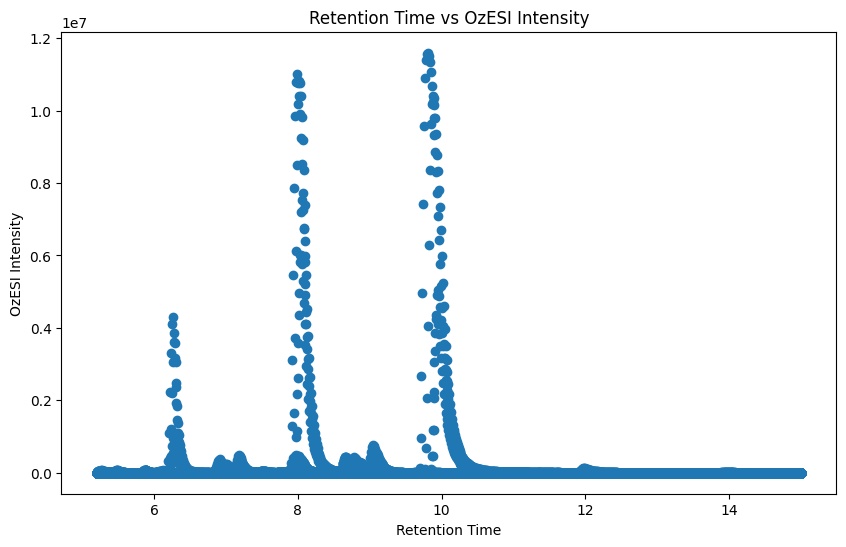

In [13]:


# Assuming clustered_data is your DataFrame with the necessary data

# Plotting the Intensity vs Retention Time
plt.figure(figsize=(10, 6))
plt.scatter(d1a['Retention_Time'], d1a['OzESI_Intensity'])

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity')

# Displaying the plot
plt.show()


# Pipeline for OzON Truth

# d1a to d1b take raw dataframe and Match Lipids

In [14]:
d1b = d1a.copy()

# Assuming df_MRM and d1b are already defined

# Create Match_Group in d1a if it doesn't exist
if 'Match_Group' not in d1a.columns:
    d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Copy Match_Group to d1b
d1b['Match_Group'] = d1a['Match_Group']

# Function to check if two ions are within the tolerance
def is_within_tolerance(ion1, ion2, tolerance=0.3):
    return abs(ion1 - ion2) <= tolerance

# Add a new column for Lipid in d1b
d1b['Lipid'] = None

# Iterate through each unique Match_Group in d1a
for group in d1a['Match_Group'].unique():
    # Extract a representative row for the current group from d1a
    group_row = d1a[d1a['Match_Group'] == group].iloc[0]

    # Find a matching lipid in df_MRM for the representative row
    for _, mrm_row in df_MRM.iterrows():
        if is_within_tolerance(group_row['Parent_Ion'], mrm_row['Parent_Ion']) and is_within_tolerance(group_row['Product_Ion'], mrm_row['Product_Ion']):
            # Assign the lipid to all rows in the corresponding group in d1b
            d1b.loc[d1b['Match_Group'] == group, 'Lipid'] = mrm_row['Lipid']
            break  # Stop searching once a match is found

# Display the updated d1b DataFrame
d1b

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid
402,227.1,183.0,5.205533,41.660004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17
403,227.1,183.0,5.218450,41.680004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17
404,227.1,183.0,5.231367,41.600002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17
405,227.1,183.0,5.244283,41.580002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17
406,227.1,183.0,5.257200,41.520004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17
...,...,...,...,...,...,...,...,...
495146,533.5,183.0,14.935583,42.640003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy
495147,533.5,183.0,14.948500,42.940002,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy
495148,533.5,183.0,14.961417,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy
495149,533.5,183.0,14.974350,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy


# Assign Correct_RT for each Lipid group is OzON to define ground truth RT for each lipid in each sample

In [15]:
d1c = d1b.copy()
#generalized method
def extract_details_from_sample_id(df, column_name='Sample_ID', new_columns=None):
    """
    Extracts specified details from the Sample_ID column and adds them as new columns.

    Args:
    df (pandas.DataFrame): The DataFrame containing the Sample_ID column.
    column_name (str): The name of the column to extract the details from. Default is 'Sample_ID'.
    new_columns (dict): A dictionary where keys are the names of new columns to be added, 
                        and values are lists of possible string values for those columns.

    Returns:
    pandas.DataFrame: The original DataFrame with added columns.
    """
    # Check if new_columns is provided
    if new_columns is None or not isinstance(new_columns, dict):
        raise ValueError("new_columns must be a dictionary with column names as keys and list of strings as values")

    # Loop through each new column and its possible values
    for col, values in new_columns.items():
        # Create a regular expression pattern for each column
        pattern = f"(?P<{col}>{'|'.join(values)})"

        # Extract the matched pattern and create the new column
        df_extracted = df[column_name].str.extract(pattern)

        # Add the new column to the original DataFrame
        df = pd.concat([df, df_extracted[[col]]], axis=1)

    return df


new_columns = {'Biology': ['cortex', 'dienc', 'hippo','cereb'],
               'Genotype': ['5xFAD','WT'],
               'Cage': ['FAD231','FAD245' 'FAD249', 'FAD257','FAD263'],
               'Mouse': ['m1','m2','m3','m4','m5']}
d1c = extract_details_from_sample_id(d1c, new_columns=new_columns)
d1c

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse
402,227.1,183.0,5.205533,41.660004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2
403,227.1,183.0,5.218450,41.680004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2
404,227.1,183.0,5.231367,41.600002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2
405,227.1,183.0,5.244283,41.580002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2
406,227.1,183.0,5.257200,41.520004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2
...,...,...,...,...,...,...,...,...,...,...,...,...
495146,533.5,183.0,14.935583,42.640003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2
495147,533.5,183.0,14.948500,42.940002,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2
495148,533.5,183.0,14.961417,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2
495149,533.5,183.0,14.974350,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2


In [16]:
d1c['Genotype'].unique()

array(['5xFAD'], dtype=object)

# Create group based off mouse cage genotype


In [17]:
import pandas as pd
d1d = d1c.copy()

def add_group_sample_column(df):
    """
    Adds a new column 'Group_Sample' to the DataFrame, assigning a unique group number 
    for each combination of Cage, Mouse, Genotype, Biology, and Lipid.

    Args:
    df (pandas.DataFrame): The DataFrame to process.

    Returns:
    pandas.DataFrame: The DataFrame with the added 'Group_Sample' column.
    """
    # Create the 'Group_Sample' column by assigning a group number for each combination
    df['Group_Sample'] = df.groupby(['Cage', 'Mouse', 'Genotype', 'Biology', 'Lipid']).ngroup()

    return df

# Usage Example:
# Assuming your DataFrame is named df
d1d = add_group_sample_column(d1c)
# add n_start column to d1d
d1d['n_start'] = None
d1d


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,Group_Sample,n_start
402,227.1,183.0,5.205533,41.660004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
403,227.1,183.0,5.218450,41.680004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
404,227.1,183.0,5.231367,41.600002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
405,227.1,183.0,5.244283,41.580002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
406,227.1,183.0,5.257200,41.520004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495146,533.5,183.0,14.935583,42.640003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None
495147,533.5,183.0,14.948500,42.940002,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None
495148,533.5,183.0,14.961417,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None
495149,533.5,183.0,14.974350,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None


In [18]:
#print unique values of genotype
d1d['Genotype'].unique()

array(['5xFAD'], dtype=object)

Functions

In [19]:
# # Determine 'FAC'
# def determine_fac(lipid):
#     # Check if the lipid is a string
#     if isinstance(lipid, str):
#         if 'FA18:1' in lipid:
#             return 'FA18:1'
#         elif 'FA16:1' in lipid:
#             return 'FA16:1'
#     # Return None if lipid is not a string or doesn't match conditions
#     return None



def extract_tg(lipid):
    # Check if the lipid is a string
    if isinstance(lipid, str):
        pattern = r'TG\(\d+:\d+\)'
        matches = re.findall(pattern, lipid)
        return ', '.join(matches) if matches else None
    else:
        # Return None if lipid is not a string
        return None



def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell
    
def remove_tg_zero(lipid):
    # Check if the lipid is a string
    if isinstance(lipid, str):
        pattern = r'TG\(\d+:0\)'
        new_lipid = re.sub(pattern, '', lipid)
        # Clean up potential extra commas and spaces
        new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
        return new_lipid
    else:
        # Return the original value if it's not a string
        return lipid
    

# Define a function to initialize and calculate n-# values based on n-#_Start
def initialize_and_calculate_n_columns(row, db_aldehyde, db_pos_list):
    n_start = row['n-#_Start']
    for number in db_pos_list:
        if number >= n_start:
            aldehyde_ion = db_aldehyde.loc[db_aldehyde["DB_Position"] == number, "Aldehyde_Ion"].values[0]
            row[f'n-{number}'] = row["Parent_Ion"] - aldehyde_ion
        else:
            row[f'n-{number}'] = pd.NA
    return row





In [20]:
d1d

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,Group_Sample,n_start
402,227.1,183.0,5.205533,41.660004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
403,227.1,183.0,5.218450,41.680004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
404,227.1,183.0,5.231367,41.600002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
405,227.1,183.0,5.244283,41.580002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
406,227.1,183.0,5.257200,41.520004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495146,533.5,183.0,14.935583,42.640003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None
495147,533.5,183.0,14.948500,42.940002,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None
495148,533.5,183.0,14.961417,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None
495149,533.5,183.0,14.974350,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None


# Determine Groups Brain Region or Liver (Biology), Genotype, FAC and remove TGs with zero double bonds

In [27]:
# Creating filtered_d3 from filtered_d2
d3 = d1d.copy()

# Sorting by 'Biology and Genotype' and then by 'Lipid'
d3 = d3.sort_values(by=['Biology','Genotype', 'Lipid'])

grouped_cluster_data = d3.groupby(['Lipid','Biology','Genotype','Sample_ID'])
#add group number to each to a new column called Group
d3['Group'] = grouped_cluster_data.ngroup()
d3


d3



,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,Group_Sample,n_start,Group
25944,339.3,183.0,5.203300,230.040024,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,339.3 -> 183.0,44,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cereb,5xFAD,FAD257,m2,108,None,0
25945,339.3,183.0,5.216233,262.140015,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,339.3 -> 183.0,44,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cereb,5xFAD,FAD257,m2,108,None,0
25946,339.3,183.0,5.229150,353.340027,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,339.3 -> 183.0,44,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cereb,5xFAD,FAD257,m2,108,None,0
25947,339.3,183.0,5.242067,435.960022,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,339.3 -> 183.0,44,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cereb,5xFAD,FAD257,m2,108,None,0
25948,339.3,183.0,5.254983,485.080048,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,339.3 -> 183.0,44,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cereb,5xFAD,FAD257,m2,108,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439418,425.4,183.0,14.941367,41.700005,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,425.4 -> 183.0,123,d2-16:0,dienc,5xFAD,FAD257,m2,215,None,215
439419,425.4,183.0,14.954300,41.660004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,425.4 -> 183.0,123,d2-16:0,dienc,5xFAD,FAD257,m2,215,None,215
439420,425.4,183.0,14.967217,41.580002,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,425.4 -> 183.0,123,d2-16:0,dienc,5xFAD,FAD257,m2,215,None,215
439421,425.4,183.0,14.980133,41.620003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,425.4 -> 183.0,123,d2-16:0,dienc,5xFAD,FAD257,m2,215,None,215


In [28]:
d1e = d1d.copy()
d1e

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,Group_Sample,n_start
402,227.1,183.0,5.205533,41.660004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
403,227.1,183.0,5.218450,41.680004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
404,227.1,183.0,5.231367,41.600002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
405,227.1,183.0,5.244283,41.580002,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
406,227.1,183.0,5.257200,41.520004,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,12:1n-11 / ... / 18:1n-17,cereb,5xFAD,FAD257,m2,112,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495146,533.5,183.0,14.935583,42.640003,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None
495147,533.5,183.0,14.948500,42.940002,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None
495148,533.5,183.0,14.961417,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None
495149,533.5,183.0,14.974350,43.340004,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0,215,24:1 | dummy,dienc,5xFAD,FAD257,m2,211,None


# SEE PEAKS

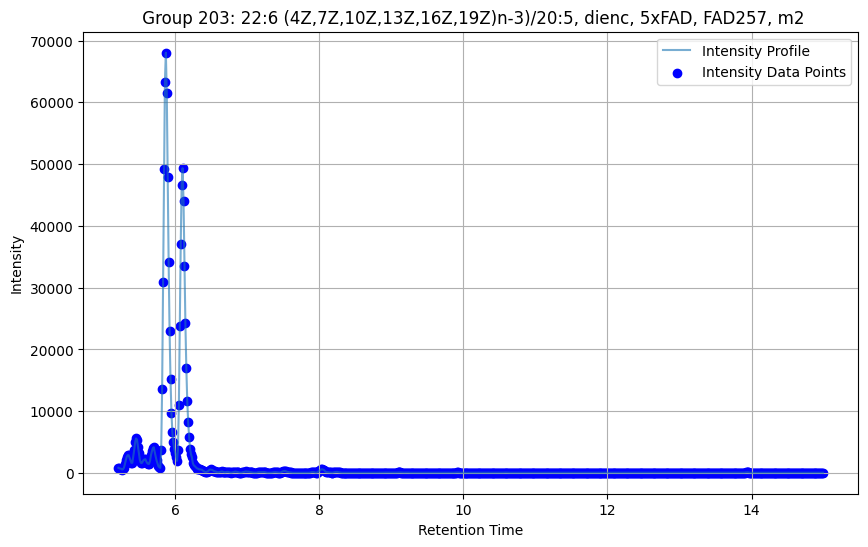

In [52]:
def plot_peaks_before(data, match_group, figsize=(10, 6)):
    subset = data[data['Group_Sample'] == match_group]
    
    if subset.empty:
        print(f"No data found for Match Group {match_group}")
        return
    
    # Extract additional details from the first entry
    lipid = subset['Lipid'].iloc[0]
    biology = subset['Biology'].iloc[0]
    genotype = subset['Genotype'].iloc[0]
    cage = subset['Cage'].iloc[0]
    mouse = subset['Mouse'].iloc[0]

    plt.figure(figsize=figsize)
    plt.scatter(subset['Retention_Time'], subset['OzESI_Intensity'], color='blue', label='Intensity Data Points')
    plt.plot(subset['Retention_Time'], subset['OzESI_Intensity'], label='Intensity Profile', alpha=0.6)

    title = f' Group {match_group}: {lipid}, {biology}, {genotype}, {cage}, {mouse}'
    plt.title(title)
    plt.xlabel('Retention Time')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_peaks_before(d1e, 203)

# FIND PEAKS

# FIND PEAKS AND SAVE ALL PEAK DATA

In [57]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

def find_peaks_custom(data, height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5):
    results = []

    for group, subset in data.groupby('Group_Sample'):
        retention_times = subset['Retention_Time'].values
        intensities = subset['OzESI_Intensity'].values
        
        # Extract additional details from the first entry
        lipid = subset['Lipid'].iloc[0]
        biology = subset['Biology'].iloc[0]
        genotype = subset['Genotype'].iloc[0]
        cage = subset['Cage'].iloc[0]
        mouse = subset['Mouse'].iloc[0]
        parent_ion = subset['Parent_Ion'].iloc[0]
        product_ion = subset['Product_Ion'].iloc[0]

        # Using provided parameters for peak detection
        peaks, properties = find_peaks(intensities, height=height, threshold=threshold, distance=distance, prominence=prominence, width=width, wlen=wlen, rel_height=rel_height)

        for i, peak in enumerate(peaks):
            peak_height = intensities[peak]
            half_max = peak_height / 2

            # Find indices where intensity drops below half max on the left and right of the peak
            left_idx = np.where(intensities[:peak] < half_max)[0]
            right_idx = np.where(intensities[peak:] < half_max)[0]

            if len(left_idx) > 0 and len(right_idx) > 0:
                left_base = left_idx[-1]
                right_base = peak + right_idx[0]

                fwhm = retention_times[right_base] - retention_times[left_base]
                peak_retention_times = retention_times[left_base:right_base + 1]
                peak_intensities = intensities[left_base:right_base + 1]
                peak_width = properties['widths'][i] if 'widths' in properties else None

                results.append({
                    'Group_Sample': group,
                    'Lipid': lipid,
                    'Biology': biology,
                    'Genotype': genotype,
                    'Cage': cage,
                    'Mouse': mouse,
                    'Parent_Ion': parent_ion,
                    'Product_Ion': product_ion,
                    'Peak_Retention_Time': retention_times[peak],
                    'Peak_Height': peak_height,
                    'FWHM': fwhm,
                    'Start': retention_times[left_base],
                    'Stop': retention_times[right_base],
                    'Peak_Width': peak_width,
                    'Peak_Data_Retention_Times': peak_retention_times,
                    'Peak_Data_Intensities': peak_intensities,
                    'Full_Data_Retention_Times': retention_times,
                    'Full_Data_Intensities': intensities
                })

    return pd.DataFrame(results)

# Example usage:
d1f = find_peaks_custom(d1e, height=5000, prominence=0.05, distance=50, width=4, wlen=10, rel_height=0.9)
d1f


,Group_Sample,Lipid,Biology,Genotype,Cage,Mouse,Parent_Ion,Product_Ion,Peak_Retention_Time,Peak_Height,FWHM,Start,Stop,Peak_Width,Peak_Data_Retention_Times,Peak_Data_Intensities,Full_Data_Retention_Times,Full_Data_Intensities
0,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cortex,5xFAD,FAD231,m2,339.3,183.0,7.516033,5.926780e+03,0.116283,7.477283,7.593567,6.445662,"[7.477283333333333, 7.490200000000001, 7.50311...","[2434.18017578125, 4213.72021484375, 5540.1801...","[5.2033000000000005, 5.216216666666667, 5.2291...","[94.02000427246094, 51.92000198364258, 74.9400..."
1,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cortex,5xFAD,FAD231,m2,339.3,183.0,8.678867,6.584715e+04,0.103367,8.627183,8.730550,8.076403,"[8.627183333333333, 8.6401, 8.653033333333333,...","[23237.822265625, 39644.58203125, 55304.34375,...","[5.2033000000000005, 5.216216666666667, 5.2291...","[94.02000427246094, 51.92000198364258, 74.9400..."
2,6,"14:0 / 22:2 (13Z,16Z)n-6,n-9 / 22:1 (13Z)n-9",cortex,5xFAD,FAD231,m2,395.3,183.0,6.299283,1.093384e+06,0.103367,6.247600,6.350967,7.751037,"[6.2476, 6.260516666666667, 6.273433333333333,...","[265395.34375, 551512.4375, 823437.5, 1036794....","[5.20105, 5.213983333333333, 5.226900000000000...","[429.1800231933594, 337.760009765625, 214.7600..."
3,7,14:1(9Z),cortex,5xFAD,FAD231,m2,393.4,183.0,5.407983,6.882601e+03,0.090433,5.369233,5.459667,7.109226,"[5.369233333333334, 5.38215, 5.395066666666667...","[2647.10009765625, 4441.8203125, 6090.74023437...","[5.201266666666667, 5.214183333333334, 5.2271,...","[232.12001037597656, 458.7000427246094, 602.40..."
4,8,15:0 / 17:1n-3 / 18:1n-4,cortex,5xFAD,FAD231,m2,409.3,183.0,7.202883,1.921848e+05,0.103350,7.164133,7.267483,7.192972,"[7.164133333333334, 7.17705, 7.189966666666667...","[84676.8046875, 131632.609375, 170996.40625, 1...","[5.200233333333333, 5.213150000000001, 5.22608...","[74.14000701904297, 67.16000366210938, 58.3200..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,178,"18:2 / 20:3 (11Z,14Z,17Z)n-3",dienc,5xFAD,FAD257,m2,447.4,183.0,7.498017,4.344174e+04,0.090450,7.459250,7.549700,7.201663,"[7.45925, 7.472166666666667, 7.4851, 7.4980166...","[21408.720703125, 32066.6015625, 41186.5234375...","[5.211116666666667, 5.224033333333334, 5.23695...","[56.44000244140625, 62.08000564575195, 53.6600..."
84,184,20:0 / 21:1n-2 / 22:1n-3,dienc,5xFAD,FAD257,m2,479.4,183.0,12.044117,1.641704e+04,0.180883,11.992433,12.173317,7.175603,"[11.992433333333334, 12.00535, 12.018266666666...","[8186.38037109375, 11426.640625, 14003.5205078...","[5.20925, 5.222166666666667, 5.2351, 5.2480166...","[50.980003356933594, 52.04000473022461, 51.640..."
85,188,"20:2 (11Z,14Z)n-6 / 20:3 (11Z,14Z,17Z)n-3,n-6 ...",dienc,5xFAD,FAD257,m2,407.3,183.0,6.182400,9.149141e+03,0.129217,6.130717,6.259933,7.619972,"[6.130716666666667, 6.14365, 6.156566666666666...","[3601.540283203125, 5603.50048828125, 7668.860...","[5.20045, 5.2133666666666665, 5.2263, 5.239216...","[41.78000259399414, 41.78000259399414, 41.7800..."
86,203,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",dienc,5xFAD,FAD257,m2,469.4,183.0,5.869233,6.803460e+04,0.090450,5.830467,5.920917,7.933484,"[5.830466666666667, 5.843383333333334, 5.8563,...","[30863.802734375, 49247.68359375, 63351.125, 6...","[5.210283333333334, 5.2232, 5.236133333333334,...","[838.280029296875, 755.2400512695312, 708.7000..."


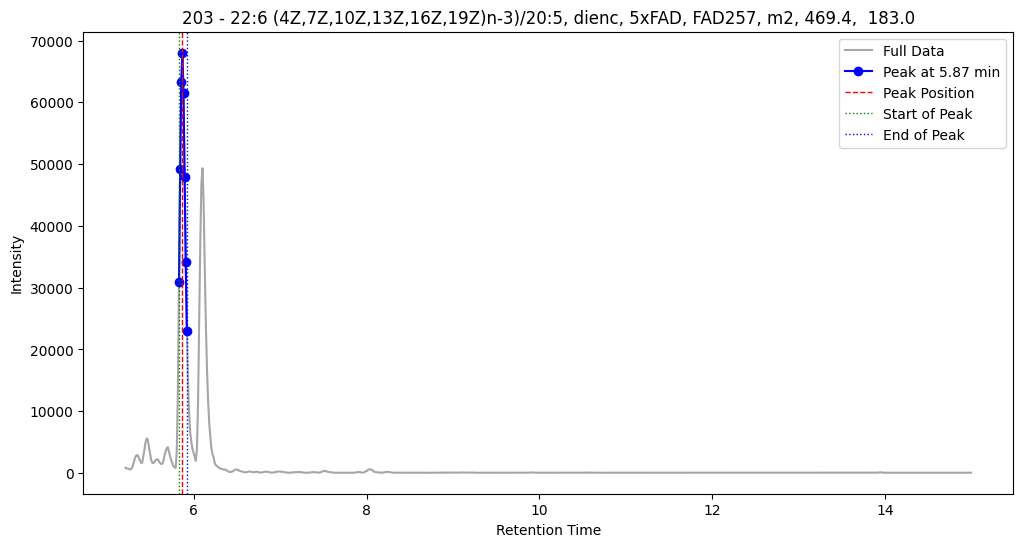

In [59]:
import matplotlib.pyplot as plt

def plot_peak_and_full_data(data, group_sample=None, plot_all=False):
    if plot_all:
        group_samples = data['Group_Sample'].unique()
    else:
        group_samples = [group_sample]
    
    for group in group_samples:
        group_data = data[data['Group_Sample'] == group]
        
        if group_data.empty:
            print(f"No data found for Group Sample {group}")
            continue
        
        # Extracting additional information for the title
        if not group_data[['Lipid', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Parent_Ion', 'Product_Ion']].empty:
            title_info = group_data[['Lipid', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Parent_Ion', 'Product_Ion']].iloc[0]
            title_str = f"{title_info['Lipid']}, {title_info['Biology']}, {title_info['Genotype']}, " \
                        f"{title_info['Cage']}, {title_info['Mouse']}, {title_info['Parent_Ion']}, " \
                        f" {title_info['Product_Ion']}"
        else:
            title_str = "No Additional Info Available"

        # Set up the plot
        plt.figure(figsize=(12, 6))
        plt.title(f'{group} - {title_str}')
        plt.xlabel('Retention Time')
        plt.ylabel('Intensity')
        
        # Plot data for each peak in the group
        for _, peak_data in group_data.iterrows():
            # Extracting the full retention times and intensities
            full_retention_times = peak_data['Full_Data_Retention_Times']
            full_intensities = peak_data['Full_Data_Intensities']
            plt.plot(full_retention_times, full_intensities, 'gray', alpha=0.7, label='Full Data')
            
            # Extracting the peak retention times and intensities
            retention_times = peak_data['Peak_Data_Retention_Times']
            intensities = peak_data['Peak_Data_Intensities']
            plt.plot(retention_times, intensities, marker='o', linestyle='-', color='blue', label=f'Peak at {peak_data["Peak_Retention_Time"]:.2f} min')
            
            # Mark the peak, start, and stop positions
            plt.axvline(x=peak_data['Peak_Retention_Time'], color='red', linestyle='--', linewidth=1, label='Peak Position')
            plt.axvline(x=peak_data['Start'], color='green', linestyle=':', linewidth=1, label='Start of Peak')
            plt.axvline(x=peak_data['Stop'], color='blue', linestyle=':', linewidth=1, label='End of Peak')
        
        # Limit the number of legend entries
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        plt.show()

# Example usage:
# # To plot data for all groups:
# plot_peak_and_full_data(d1f, plot_all=False)

# To plot data for a specific group, e.g., group 0:
plot_peak_and_full_data(d1f, group_sample=203)


In [60]:
import re

def add_lipid_lengths(df):
    # Define a regular expression pattern to capture the #:# format
    pattern = r'\b\d+:\d+\b'
    
    # Function to extract and concatenate matching patterns
    def extract_lengths(lipid):
        # Find all occurrences of the pattern
        matches = re.findall(pattern, lipid)
        # Concatenate all matches with a slash '/'
        return ' / '.join(matches)
    
    # Apply the function to the 'Lipid' column and create a new 'Lipid_Length' column
    df['Lipid_Length'] = df['Lipid'].apply(extract_lengths)
    return df
d1f_v2 = add_lipid_lengths(d1f)
d1f_v2

,Group_Sample,Lipid,Biology,Genotype,Cage,Mouse,Parent_Ion,Product_Ion,Peak_Retention_Time,Peak_Height,FWHM,Start,Stop,Peak_Width,Peak_Data_Retention_Times,Peak_Data_Intensities,Full_Data_Retention_Times,Full_Data_Intensities,Lipid_Length
0,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cortex,5xFAD,FAD231,m2,339.3,183.0,7.516033,5.926780e+03,0.116283,7.477283,7.593567,6.445662,"[7.477283333333333, 7.490200000000001, 7.50311...","[2434.18017578125, 4213.72021484375, 5540.1801...","[5.2033000000000005, 5.216216666666667, 5.2291...","[94.02000427246094, 51.92000198364258, 74.9400...",10:0 / 18:2 / 14:1 / 18:3 / 16:1 / 18:1
1,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cortex,5xFAD,FAD231,m2,339.3,183.0,8.678867,6.584715e+04,0.103367,8.627183,8.730550,8.076403,"[8.627183333333333, 8.6401, 8.653033333333333,...","[23237.822265625, 39644.58203125, 55304.34375,...","[5.2033000000000005, 5.216216666666667, 5.2291...","[94.02000427246094, 51.92000198364258, 74.9400...",10:0 / 18:2 / 14:1 / 18:3 / 16:1 / 18:1
2,6,"14:0 / 22:2 (13Z,16Z)n-6,n-9 / 22:1 (13Z)n-9",cortex,5xFAD,FAD231,m2,395.3,183.0,6.299283,1.093384e+06,0.103367,6.247600,6.350967,7.751037,"[6.2476, 6.260516666666667, 6.273433333333333,...","[265395.34375, 551512.4375, 823437.5, 1036794....","[5.20105, 5.213983333333333, 5.226900000000000...","[429.1800231933594, 337.760009765625, 214.7600...",14:0 / 22:2 / 22:1
3,7,14:1(9Z),cortex,5xFAD,FAD231,m2,393.4,183.0,5.407983,6.882601e+03,0.090433,5.369233,5.459667,7.109226,"[5.369233333333334, 5.38215, 5.395066666666667...","[2647.10009765625, 4441.8203125, 6090.74023437...","[5.201266666666667, 5.214183333333334, 5.2271,...","[232.12001037597656, 458.7000427246094, 602.40...",14:1
4,8,15:0 / 17:1n-3 / 18:1n-4,cortex,5xFAD,FAD231,m2,409.3,183.0,7.202883,1.921848e+05,0.103350,7.164133,7.267483,7.192972,"[7.164133333333334, 7.17705, 7.189966666666667...","[84676.8046875, 131632.609375, 170996.40625, 1...","[5.200233333333333, 5.213150000000001, 5.22608...","[74.14000701904297, 67.16000366210938, 58.3200...",15:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,178,"18:2 / 20:3 (11Z,14Z,17Z)n-3",dienc,5xFAD,FAD257,m2,447.4,183.0,7.498017,4.344174e+04,0.090450,7.459250,7.549700,7.201663,"[7.45925, 7.472166666666667, 7.4851, 7.4980166...","[21408.720703125, 32066.6015625, 41186.5234375...","[5.211116666666667, 5.224033333333334, 5.23695...","[56.44000244140625, 62.08000564575195, 53.6600...",18:2 / 20:3
84,184,20:0 / 21:1n-2 / 22:1n-3,dienc,5xFAD,FAD257,m2,479.4,183.0,12.044117,1.641704e+04,0.180883,11.992433,12.173317,7.175603,"[11.992433333333334, 12.00535, 12.018266666666...","[8186.38037109375, 11426.640625, 14003.5205078...","[5.20925, 5.222166666666667, 5.2351, 5.2480166...","[50.980003356933594, 52.04000473022461, 51.640...",20:0
85,188,"20:2 (11Z,14Z)n-6 / 20:3 (11Z,14Z,17Z)n-3,n-6 ...",dienc,5xFAD,FAD257,m2,407.3,183.0,6.182400,9.149141e+03,0.129217,6.130717,6.259933,7.619972,"[6.130716666666667, 6.14365, 6.156566666666666...","[3601.540283203125, 5603.50048828125, 7668.860...","[5.20045, 5.2133666666666665, 5.2263, 5.239216...","[41.78000259399414, 41.78000259399414, 41.7800...",20:2 / 20:3 / 15:1
86,203,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",dienc,5xFAD,FAD257,m2,469.4,183.0,5.869233,6.803460e+04,0.090450,5.830467,5.920917,7.933484,"[5.830466666666667, 5.843383333333334, 5.8563,...","[30863.802734375, 49247.68359375, 63351.125, 6...","[5.210283333333334, 5.2232, 5.236133333333334,...","[838.280029296875, 755.2400512695312, 708.7000...",22:6 / 20:5


# Peak area

In [61]:
import numpy as np

# Function to calculate peak area for Gaussian-like peaks
def calculate_peak_area(df):
    sqrt_pi_ln2 = np.sqrt(np.pi / (4 * np.log(2)))
    df['Peak_Area'] = df['Peak_Height'] * df['FWHM'] * sqrt_pi_ln2

    loc = df.columns.get_loc('Peak_Width') + 1
    return df


import pandas as pd

def round_dataframe(df):
    # Define a helper function to handle potentially list-like entries in DataFrame cells
    def round_elements(x):
        if isinstance(x, list):  # Check if the item is a list
            return [round(item, 2) if isinstance(item, float) else item for item in x]
        elif isinstance(x, float):  # Check if the item is a float
            return round(x, 2)
        else:
            return x

    # Apply rounding to each column that contains numerical data
    for col in df.columns:
        df[col] = df[col].apply(round_elements)
    
    return df



# Apply the function to your DataFrame
d1f_v3 = calculate_peak_area(d1f_v2)
# Assuming d1f_v2 is your DataFrame
# d1f_v2 = create_or_load_your_dataframe_function()
d1f_v4 = round_dataframe(d1f_v3)

d1f_v4


,Group_Sample,Lipid,Biology,Genotype,Cage,Mouse,Parent_Ion,Product_Ion,Peak_Retention_Time,Peak_Height,FWHM,Start,Stop,Peak_Width,Peak_Data_Retention_Times,Peak_Data_Intensities,Full_Data_Retention_Times,Full_Data_Intensities,Lipid_Length,Peak_Area
0,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cortex,5xFAD,FAD231,m2,339.3,183.0,7.52,5926.78,0.12,7.48,7.59,6.45,"[7.477283333333333, 7.490200000000001, 7.50311...","[2434.18017578125, 4213.72021484375, 5540.1801...","[5.2033000000000005, 5.216216666666667, 5.2291...","[94.02000427246094, 51.92000198364258, 74.9400...",10:0 / 18:2 / 14:1 / 18:3 / 16:1 / 18:1,733.62
1,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cortex,5xFAD,FAD231,m2,339.3,183.0,8.68,65847.15,0.10,8.63,8.73,8.08,"[8.627183333333333, 8.6401, 8.653033333333333,...","[23237.822265625, 39644.58203125, 55304.34375,...","[5.2033000000000005, 5.216216666666667, 5.2291...","[94.02000427246094, 51.92000198364258, 74.9400...",10:0 / 18:2 / 14:1 / 18:3 / 16:1 / 18:1,7245.19
2,6,"14:0 / 22:2 (13Z,16Z)n-6,n-9 / 22:1 (13Z)n-9",cortex,5xFAD,FAD231,m2,395.3,183.0,6.30,1093384.38,0.10,6.25,6.35,7.75,"[6.2476, 6.260516666666667, 6.273433333333333,...","[265395.34375, 551512.4375, 823437.5, 1036794....","[5.20105, 5.213983333333333, 5.226900000000000...","[429.1800231933594, 337.760009765625, 214.7600...",14:0 / 22:2 / 22:1,120305.53
3,7,14:1(9Z),cortex,5xFAD,FAD231,m2,393.4,183.0,5.41,6882.60,0.09,5.37,5.46,7.11,"[5.369233333333334, 5.38215, 5.395066666666667...","[2647.10009765625, 4441.8203125, 6090.74023437...","[5.201266666666667, 5.214183333333334, 5.2271,...","[232.12001037597656, 458.7000427246094, 602.40...",14:1,662.54
4,8,15:0 / 17:1n-3 / 18:1n-4,cortex,5xFAD,FAD231,m2,409.3,183.0,7.20,192184.80,0.10,7.16,7.27,7.19,"[7.164133333333334, 7.17705, 7.189966666666667...","[84676.8046875, 131632.609375, 170996.40625, 1...","[5.200233333333333, 5.213150000000001, 5.22608...","[74.14000701904297, 67.16000366210938, 58.3200...",15:0,21142.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,178,"18:2 / 20:3 (11Z,14Z,17Z)n-3",dienc,5xFAD,FAD257,m2,447.4,183.0,7.50,43441.74,0.09,7.46,7.55,7.20,"[7.45925, 7.472166666666667, 7.4851, 7.4980166...","[21408.720703125, 32066.6015625, 41186.5234375...","[5.211116666666667, 5.224033333333334, 5.23695...","[56.44000244140625, 62.08000564575195, 53.6600...",18:2 / 20:3,4182.62
84,184,20:0 / 21:1n-2 / 22:1n-3,dienc,5xFAD,FAD257,m2,479.4,183.0,12.04,16417.04,0.18,11.99,12.17,7.18,"[11.992433333333334, 12.00535, 12.018266666666...","[8186.38037109375, 11426.640625, 14003.5205078...","[5.20925, 5.222166666666667, 5.2351, 5.2480166...","[50.980003356933594, 52.04000473022461, 51.640...",20:0,3161.01
85,188,"20:2 (11Z,14Z)n-6 / 20:3 (11Z,14Z,17Z)n-3,n-6 ...",dienc,5xFAD,FAD257,m2,407.3,183.0,6.18,9149.14,0.13,6.13,6.26,7.62,"[6.130716666666667, 6.14365, 6.156566666666666...","[3601.540283203125, 5603.50048828125, 7668.860...","[5.20045, 5.2133666666666665, 5.2263, 5.239216...","[41.78000259399414, 41.78000259399414, 41.7800...",20:2 / 20:3 / 15:1,1258.44
86,203,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",dienc,5xFAD,FAD257,m2,469.4,183.0,5.87,68034.60,0.09,5.83,5.92,7.93,"[5.830466666666667, 5.843383333333334, 5.8563,...","[30863.802734375, 49247.68359375, 63351.125, 6...","[5.210283333333334, 5.2232, 5.236133333333334,...","[838.280029296875, 755.2400512695312, 708.7000...",22:6 / 20:5,6550.44


In [62]:
import pandas as pd

# Assuming 'd1f_v4' is your DataFrame already loaded or defined elsewhere
# Example structure of d1f_v4 (for illustration, you should already have this DataFrame)
# d1f_v4 = pd.DataFrame({
#     'Group_Sample': [1, 2],
#     'Lipid': ['10:0 / 18:2', '11:0 / 15:1'],
#     'Peak_Height': [200, 300],
#     'Peak_Width': [0.5, 0.6],
#     'Peak_Area': [100, 150],
#     'Other_Column': [7, 8]
# })

# Step 1: Get a list of all columns
columns = list(d1f_v4.columns)

# Step 2: Remove 'Peak_Area' from the list
columns.remove('Peak_Area')

# Step 3: Find the index of 'Peak_Width'
index_of_peak_width = columns.index('Peak_Width')

# Step 4: Insert 'Peak_Area' right after 'Peak_Width'
columns.insert(index_of_peak_width + 1, 'Peak_Area')

# Step 5: Reorder the DataFrame without losing any data
d1f_v4 = d1f_v4[columns]

d1f_v4



,Group_Sample,Lipid,Biology,Genotype,Cage,Mouse,Parent_Ion,Product_Ion,Peak_Retention_Time,Peak_Height,FWHM,Start,Stop,Peak_Width,Peak_Area,Peak_Data_Retention_Times,Peak_Data_Intensities,Full_Data_Retention_Times,Full_Data_Intensities,Lipid_Length
0,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cortex,5xFAD,FAD231,m2,339.3,183.0,7.52,5926.78,0.12,7.48,7.59,6.45,733.62,"[7.477283333333333, 7.490200000000001, 7.50311...","[2434.18017578125, 4213.72021484375, 5540.1801...","[5.2033000000000005, 5.216216666666667, 5.2291...","[94.02000427246094, 51.92000198364258, 74.9400...",10:0 / 18:2 / 14:1 / 18:3 / 16:1 / 18:1
1,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cortex,5xFAD,FAD231,m2,339.3,183.0,8.68,65847.15,0.10,8.63,8.73,8.08,7245.19,"[8.627183333333333, 8.6401, 8.653033333333333,...","[23237.822265625, 39644.58203125, 55304.34375,...","[5.2033000000000005, 5.216216666666667, 5.2291...","[94.02000427246094, 51.92000198364258, 74.9400...",10:0 / 18:2 / 14:1 / 18:3 / 16:1 / 18:1
2,6,"14:0 / 22:2 (13Z,16Z)n-6,n-9 / 22:1 (13Z)n-9",cortex,5xFAD,FAD231,m2,395.3,183.0,6.30,1093384.38,0.10,6.25,6.35,7.75,120305.53,"[6.2476, 6.260516666666667, 6.273433333333333,...","[265395.34375, 551512.4375, 823437.5, 1036794....","[5.20105, 5.213983333333333, 5.226900000000000...","[429.1800231933594, 337.760009765625, 214.7600...",14:0 / 22:2 / 22:1
3,7,14:1(9Z),cortex,5xFAD,FAD231,m2,393.4,183.0,5.41,6882.60,0.09,5.37,5.46,7.11,662.54,"[5.369233333333334, 5.38215, 5.395066666666667...","[2647.10009765625, 4441.8203125, 6090.74023437...","[5.201266666666667, 5.214183333333334, 5.2271,...","[232.12001037597656, 458.7000427246094, 602.40...",14:1
4,8,15:0 / 17:1n-3 / 18:1n-4,cortex,5xFAD,FAD231,m2,409.3,183.0,7.20,192184.80,0.10,7.16,7.27,7.19,21142.76,"[7.164133333333334, 7.17705, 7.189966666666667...","[84676.8046875, 131632.609375, 170996.40625, 1...","[5.200233333333333, 5.213150000000001, 5.22608...","[74.14000701904297, 67.16000366210938, 58.3200...",15:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,178,"18:2 / 20:3 (11Z,14Z,17Z)n-3",dienc,5xFAD,FAD257,m2,447.4,183.0,7.50,43441.74,0.09,7.46,7.55,7.20,4182.62,"[7.45925, 7.472166666666667, 7.4851, 7.4980166...","[21408.720703125, 32066.6015625, 41186.5234375...","[5.211116666666667, 5.224033333333334, 5.23695...","[56.44000244140625, 62.08000564575195, 53.6600...",18:2 / 20:3
84,184,20:0 / 21:1n-2 / 22:1n-3,dienc,5xFAD,FAD257,m2,479.4,183.0,12.04,16417.04,0.18,11.99,12.17,7.18,3161.01,"[11.992433333333334, 12.00535, 12.018266666666...","[8186.38037109375, 11426.640625, 14003.5205078...","[5.20925, 5.222166666666667, 5.2351, 5.2480166...","[50.980003356933594, 52.04000473022461, 51.640...",20:0
85,188,"20:2 (11Z,14Z)n-6 / 20:3 (11Z,14Z,17Z)n-3,n-6 ...",dienc,5xFAD,FAD257,m2,407.3,183.0,6.18,9149.14,0.13,6.13,6.26,7.62,1258.44,"[6.130716666666667, 6.14365, 6.156566666666666...","[3601.540283203125, 5603.50048828125, 7668.860...","[5.20045, 5.2133666666666665, 5.2263, 5.239216...","[41.78000259399414, 41.78000259399414, 41.7800...",20:2 / 20:3 / 15:1
86,203,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",dienc,5xFAD,FAD257,m2,469.4,183.0,5.87,68034.60,0.09,5.83,5.92,7.93,6550.44,"[5.830466666666667, 5.843383333333334, 5.8563,...","[30863.802734375, 49247.68359375, 63351.125, 6...","[5.210283333333334, 5.2232, 5.236133333333334,...","[838.280029296875, 755.2400512695312, 708.7000...",22:6 / 20:5


In [69]:
d2 = d1f_v4.copy()
d2

,Group_Sample,Lipid,Biology,Genotype,Cage,Mouse,Parent_Ion,Product_Ion,Peak_Retention_Time,Peak_Height,FWHM,Start,Stop,Peak_Width,Peak_Area,Peak_Data_Retention_Times,Peak_Data_Intensities,Full_Data_Retention_Times,Full_Data_Intensities,Lipid_Length
0,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cortex,5xFAD,FAD231,m2,339.3,183.0,7.52,5926.78,0.12,7.48,7.59,6.45,733.62,"[7.477283333333333, 7.490200000000001, 7.50311...","[2434.18017578125, 4213.72021484375, 5540.1801...","[5.2033000000000005, 5.216216666666667, 5.2291...","[94.02000427246094, 51.92000198364258, 74.9400...",10:0 / 18:2 / 14:1 / 18:3 / 16:1 / 18:1
1,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",cortex,5xFAD,FAD231,m2,339.3,183.0,8.68,65847.15,0.10,8.63,8.73,8.08,7245.19,"[8.627183333333333, 8.6401, 8.653033333333333,...","[23237.822265625, 39644.58203125, 55304.34375,...","[5.2033000000000005, 5.216216666666667, 5.2291...","[94.02000427246094, 51.92000198364258, 74.9400...",10:0 / 18:2 / 14:1 / 18:3 / 16:1 / 18:1
2,6,"14:0 / 22:2 (13Z,16Z)n-6,n-9 / 22:1 (13Z)n-9",cortex,5xFAD,FAD231,m2,395.3,183.0,6.30,1093384.38,0.10,6.25,6.35,7.75,120305.53,"[6.2476, 6.260516666666667, 6.273433333333333,...","[265395.34375, 551512.4375, 823437.5, 1036794....","[5.20105, 5.213983333333333, 5.226900000000000...","[429.1800231933594, 337.760009765625, 214.7600...",14:0 / 22:2 / 22:1
3,7,14:1(9Z),cortex,5xFAD,FAD231,m2,393.4,183.0,5.41,6882.60,0.09,5.37,5.46,7.11,662.54,"[5.369233333333334, 5.38215, 5.395066666666667...","[2647.10009765625, 4441.8203125, 6090.74023437...","[5.201266666666667, 5.214183333333334, 5.2271,...","[232.12001037597656, 458.7000427246094, 602.40...",14:1
4,8,15:0 / 17:1n-3 / 18:1n-4,cortex,5xFAD,FAD231,m2,409.3,183.0,7.20,192184.80,0.10,7.16,7.27,7.19,21142.76,"[7.164133333333334, 7.17705, 7.189966666666667...","[84676.8046875, 131632.609375, 170996.40625, 1...","[5.200233333333333, 5.213150000000001, 5.22608...","[74.14000701904297, 67.16000366210938, 58.3200...",15:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,178,"18:2 / 20:3 (11Z,14Z,17Z)n-3",dienc,5xFAD,FAD257,m2,447.4,183.0,7.50,43441.74,0.09,7.46,7.55,7.20,4182.62,"[7.45925, 7.472166666666667, 7.4851, 7.4980166...","[21408.720703125, 32066.6015625, 41186.5234375...","[5.211116666666667, 5.224033333333334, 5.23695...","[56.44000244140625, 62.08000564575195, 53.6600...",18:2 / 20:3
84,184,20:0 / 21:1n-2 / 22:1n-3,dienc,5xFAD,FAD257,m2,479.4,183.0,12.04,16417.04,0.18,11.99,12.17,7.18,3161.01,"[11.992433333333334, 12.00535, 12.018266666666...","[8186.38037109375, 11426.640625, 14003.5205078...","[5.20925, 5.222166666666667, 5.2351, 5.2480166...","[50.980003356933594, 52.04000473022461, 51.640...",20:0
85,188,"20:2 (11Z,14Z)n-6 / 20:3 (11Z,14Z,17Z)n-3,n-6 ...",dienc,5xFAD,FAD257,m2,407.3,183.0,6.18,9149.14,0.13,6.13,6.26,7.62,1258.44,"[6.130716666666667, 6.14365, 6.156566666666666...","[3601.540283203125, 5603.50048828125, 7668.860...","[5.20045, 5.2133666666666665, 5.2263, 5.239216...","[41.78000259399414, 41.78000259399414, 41.7800...",20:2 / 20:3 / 15:1
86,203,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",dienc,5xFAD,FAD257,m2,469.4,183.0,5.87,68034.60,0.09,5.83,5.92,7.93,6550.44,"[5.830466666666667, 5.843383333333334, 5.8563,...","[30863.802734375, 49247.68359375, 63351.125, 6...","[5.210283333333334, 5.2232, 5.236133333333334,...","[838.280029296875, 755.2400512695312, 708.7000...",22:6 / 20:5


# Plots

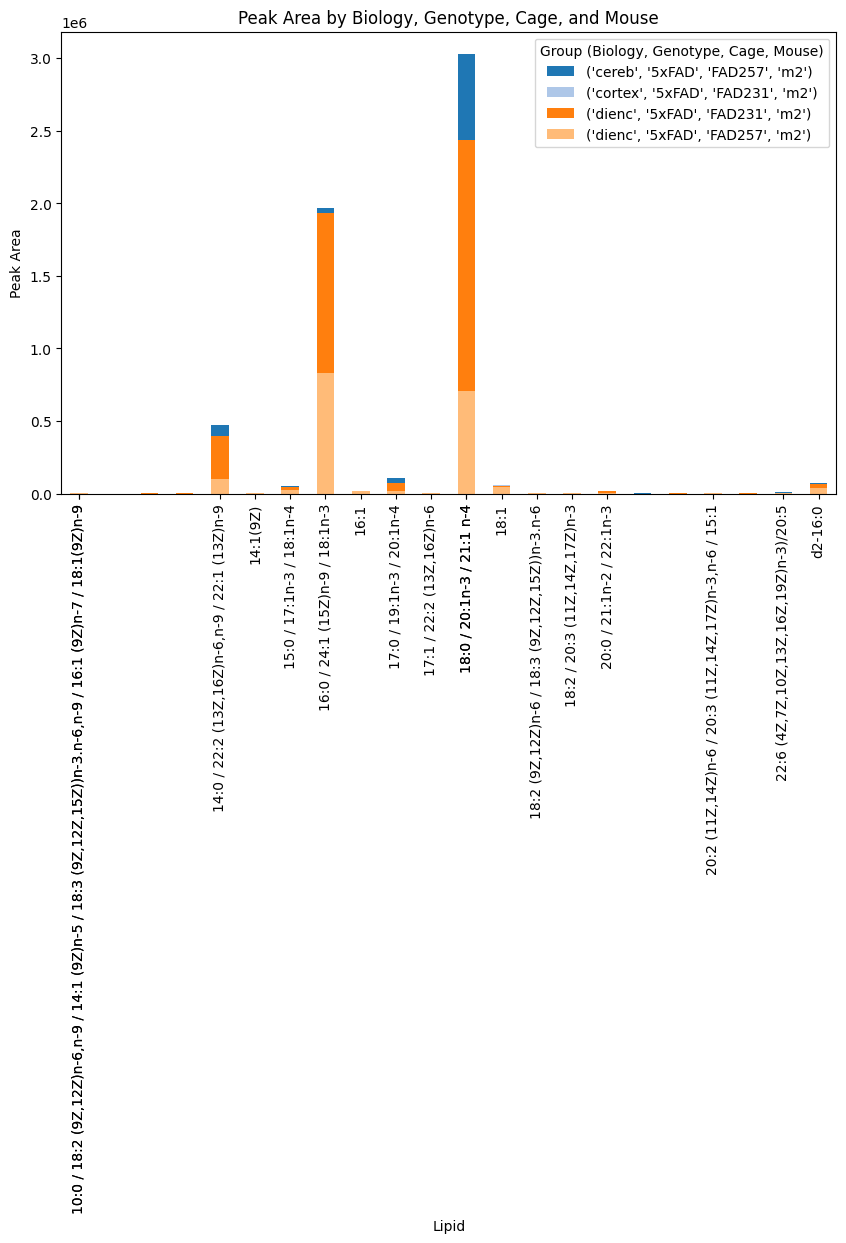

In [75]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by the combination of Biology, Genotype, Cage, and Mouse
grouped = d2.groupby(['Biology', 'Genotype', 'Cage', 'Mouse'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes.
for (key, group), color in zip(grouped, plt.cm.tab20.colors):
    # For each group, plot the peak area with bar plot
    group.plot(kind='bar', x='Lipid', y='Peak_Area', ax=ax, label=str(key), color=color)

# Set labels and title
ax.set_xlabel('Lipid')
ax.set_ylabel('Peak Area')
ax.set_title('Peak Area by Biology, Genotype, Cage, and Mouse')
ax.legend(title='Group (Biology, Genotype, Cage, Mouse)')


plt.show()


# bar plots seperate

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


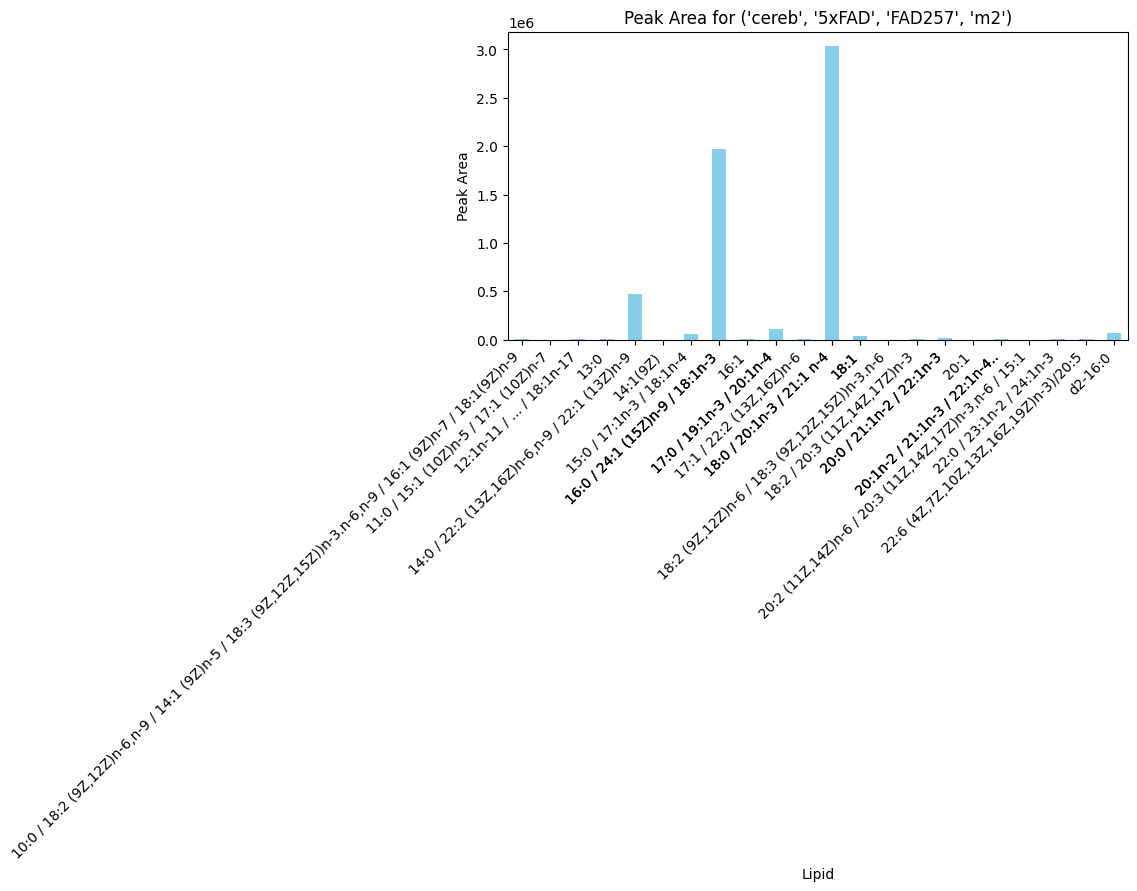

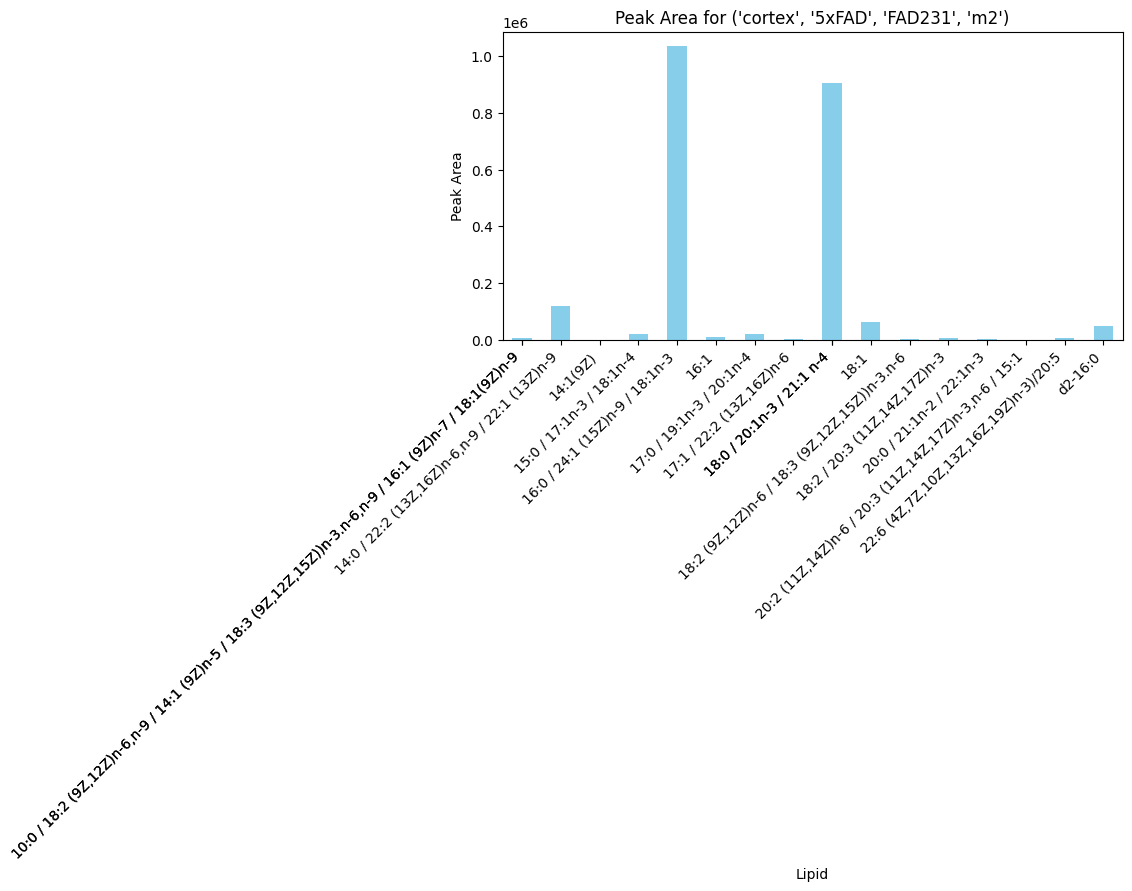

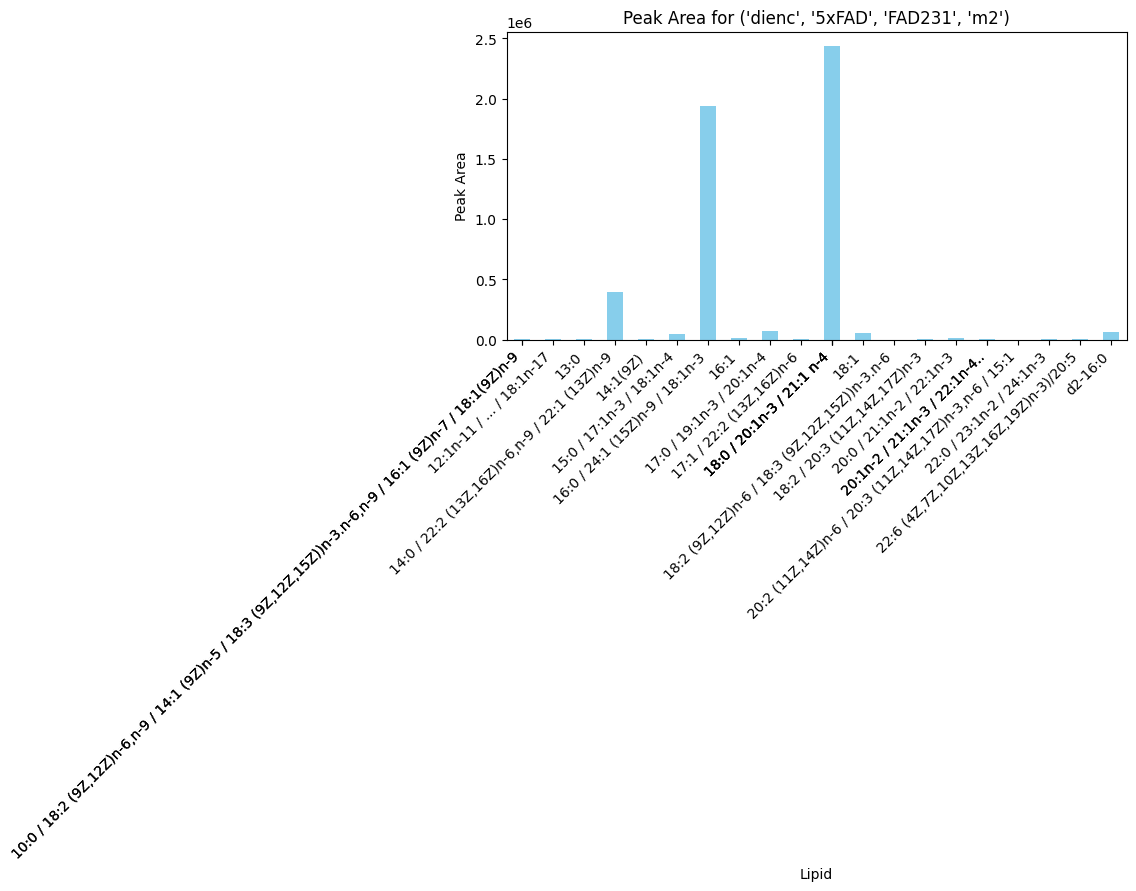

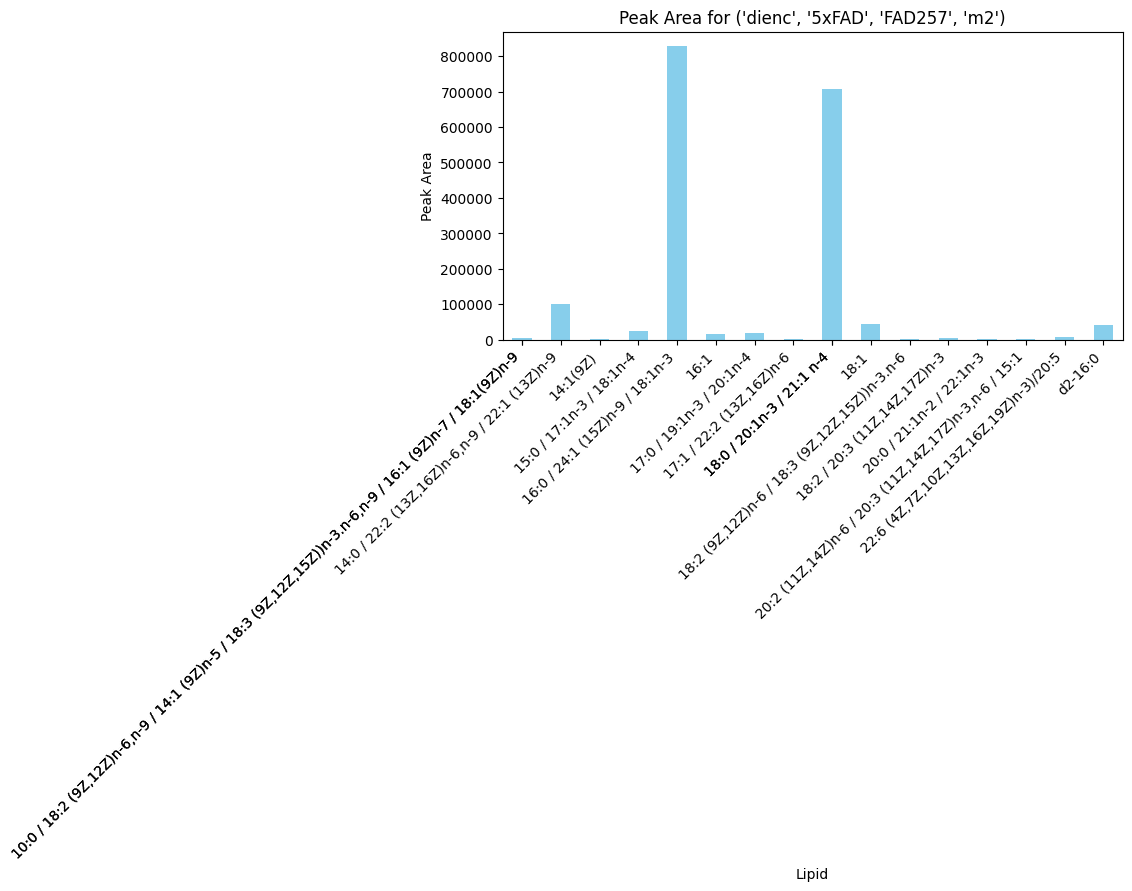

In [76]:
import matplotlib.pyplot as plt

# Assuming 'd2' is your DataFrame that has been loaded or defined previously

# Group by the combination of Biology, Genotype, Cage, and Mouse
grouped = d2.groupby(['Biology', 'Genotype', 'Cage', 'Mouse'])

# Plotting each group separately
for name, group in grouped:
    fig, ax = plt.subplots(figsize=(8, 4))  # Create a figure and an axes for each group.
    group.plot(kind='bar', x='Lipid', y='Peak_Area', ax=ax, legend=False, color='skyblue')
    ax.set_title(f'Peak Area for {name}')  # Set title with group details
    ax.set_xlabel('Lipid')
    ax.set_ylabel('Peak Area')
    ax.set_xticklabels(group['Lipid'], rotation=45, ha='right')

    plt.tight_layout()  # Adjust layout to make room for rotated x-labels
    plt.show()  # Display the plot
